In [1]:
from pathlib import Path 

# Path.cwd()

# Path('/home/darkest/ExpDataBase/2ADAS/')
from DPI import hl2adb as hl2a

from scipy import signal,fft

%matplotlib widget
from matplotlib import pyplot as plt
import numpy as np

import scipy.io as sio
import mat73
# data = sio.loadmat('file.mat')
# data = mat73.loadmat('file.mat')

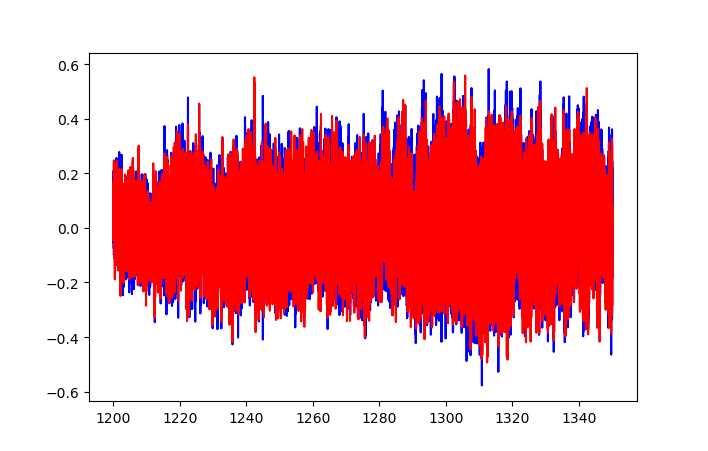

In [2]:
x, y, U = hl2a(36989, 'mece_61', 1.2, 1.35, '1.25e6hz', 'ecf')
x2, y2, U2 = hl2a(36989, 'mece_62', 1.2, 1.35, '1.25e6hz', 'ecf')

y=signal.detrend(y)
y2=signal.detrend(y2)

fig,ax = plt.subplots(num=1, figsize=(3.54*2, 2.26*2))
ax.plot(x,y,'b-')
ax.plot(x2,y2,'r-')
# plt.show()
wave = y+y2*1J

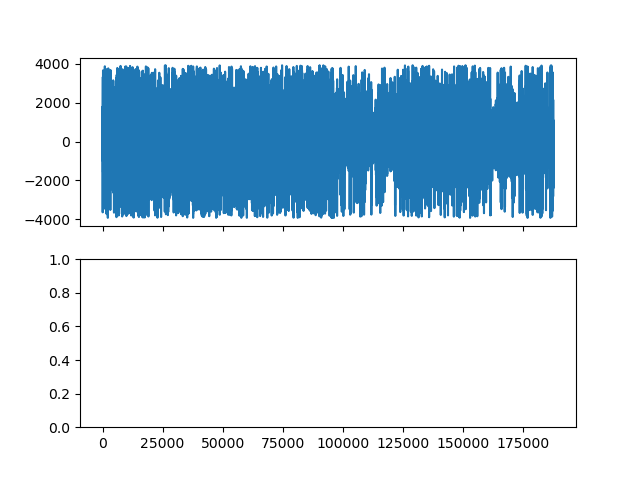

In [3]:
phi = np.unwrap(np.arctan2(y2,y))
dphidt = np.diff(phi)/np.diff(x)
fig,axs=plt.subplots(nrows=2,ncols=1,sharex=True)
# axs[0].plot(x/1e3-0.9,phi)
axs[0].plot(dphidt)

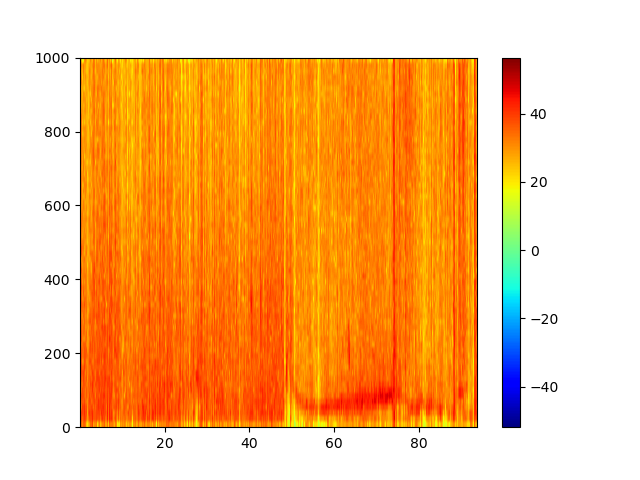

In [4]:
fig,axs=plt.subplots()
p,f,t,im =axs.specgram(dphidt,NFFT=128,noverlap=50,Fs = 2e3,detrend='linear',cmap='jet', scale_by_freq=True,mode='magnitude')
fig.colorbar(im, ax=axs)

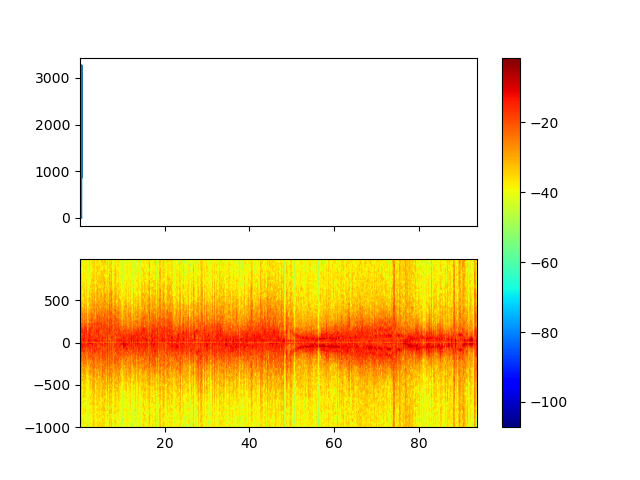

In [5]:
phi_d= signal.detrend(phi)
fig,axs=plt.subplots(nrows=2,ncols=1,sharex=True)
axs[0].plot(x/1e3-0.9,phi)
p,f,t,im =axs[1].specgram(wave/abs(wave),NFFT=128,noverlap=50,Fs = 2e3,detrend='linear',cmap='jet', scale_by_freq=True,mode='magnitude')
fig.colorbar(im, ax=axs)

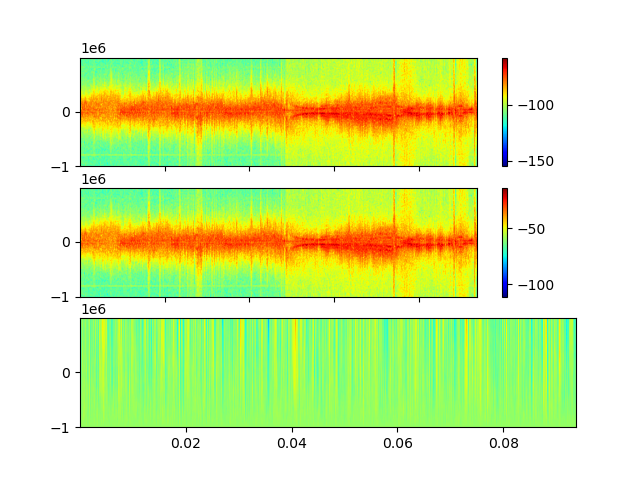

In [6]:
fig,axs=plt.subplots(nrows=3,ncols=1,sharex=True)
p11,f,t,im =axs[0].specgram(wave,NFFT=128,noverlap=50,Fs = 2e6,detrend='linear',cmap=plt.cm.jet, scale_by_freq=True,mode='psd',sides='default') 
p22,f,t,im1 =axs[1].specgram(wave,NFFT=128,noverlap=50,Fs = 2e6,detrend='linear',cmap=plt.cm.jet, scale_by_freq=True,mode='magnitude',sides='default') 
p,f,t,im2 =axs[2].specgram(wave,NFFT=128,noverlap=50,Fs = 2e6,detrend='linear',cmap='jet', scale_by_freq=True,mode='phase',sides='default') 
fig.colorbar(im, ax=axs[0])
fig.colorbar(im1, ax=axs[1])

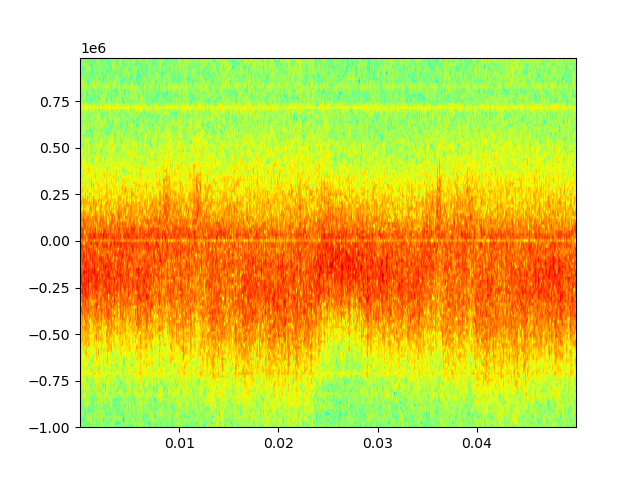

In [6]:
fig, ax = plt.subplots()
p,f,t,im =plt.specgram(wave,NFFT=128,noverlap=50,Fs = 2e6,detrend='linear',cmap=plt.cm.jet, scale_by_freq=True,mode='psd',sides='default') 

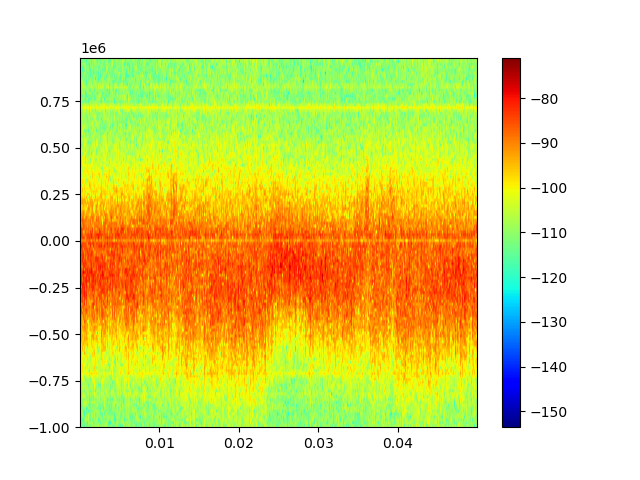

In [7]:
fig, ax = plt.subplots()
p2,f2,t2,im2 =ax.specgram(wave,NFFT=128,noverlap=50,Fs = 2e6,detrend='mean',cmap=plt.cm.jet, scale_by_freq=True,mode='psd',sides='default') 
fig.colorbar(im2, ax=ax)

KeyboardInterrupt: 

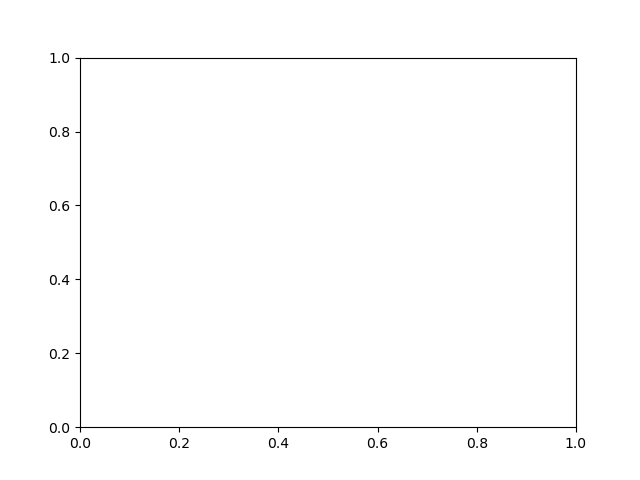

In [8]:
fig, ax = plt.subplots()
pp = signal.correlate2d(p11,p22,mode='same')

plt.pcolormesh(t*1e3,f,pp,cmap=plt.cm.jet)
plt.colorbar()

In [11]:
channelName=['CPS07','CPS08']

In [13]:
channelName[1]

'CPS08'

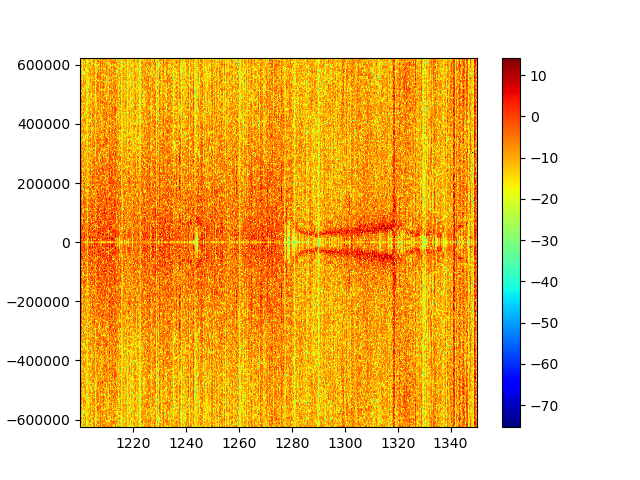

In [23]:
f,t,s=signal.spectrogram(dphidt,fs=1.25e6,nperseg=256,noverlap=120,nfft=1024,detrend='linear',mode='psd',return_onesided=False)
fig, ax = plt.subplots()
plt.pcolormesh(t*1e3+x[0],fft.fftshift(f),10*np.log10(fft.fftshift(s, axes=0)),cmap='jet')
# plt.pcolormesh(t*1e3+x[0],f,10*np.log10(s),cmap='jet')
plt.colorbar()

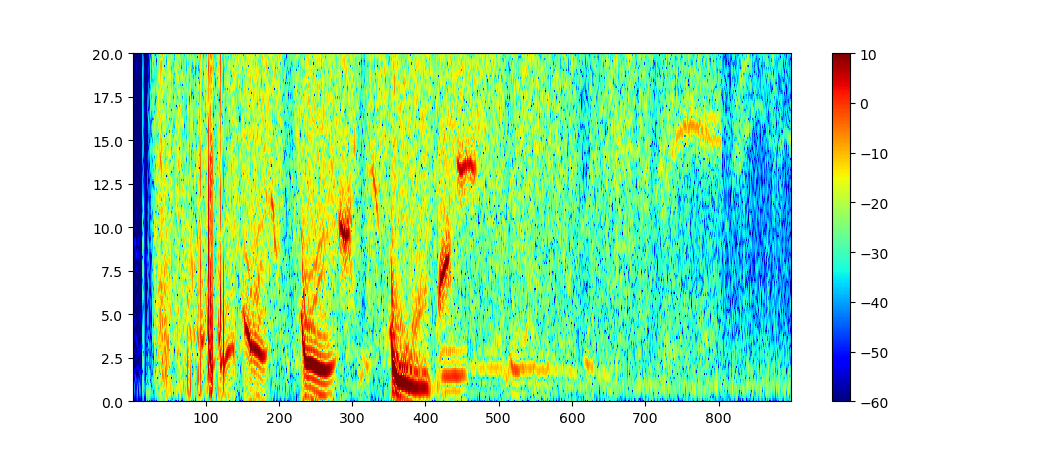

In [8]:
x, y, U = hl2a(1793, 'MDBP01', 0, 0.9)
freq = 1/(x[1]-x[0])
# f,t,s=signal.spectrogram(y,fs=freq,nperseg=2048*2,noverlap=1024*2,nfft=2048*2*2,detrend='linear',mode='psd',return_onesided=False)
f,t,s=signal.spectrogram(y,fs=freq,nperseg=1024*2,noverlap=1500,nfft=1024**2,detrend='linear',mode='psd',return_onesided=False)
fig, ax = plt.subplots(figsize=(3.54*3, 2.26*2))
plt.pcolormesh(t+x[0],fft.fftshift(f),10*np.log10(fft.fftshift(s, axes=0)),cmap='jet')
plt.ylim(0,20)
plt.clim(-60,10)
plt.colorbar()

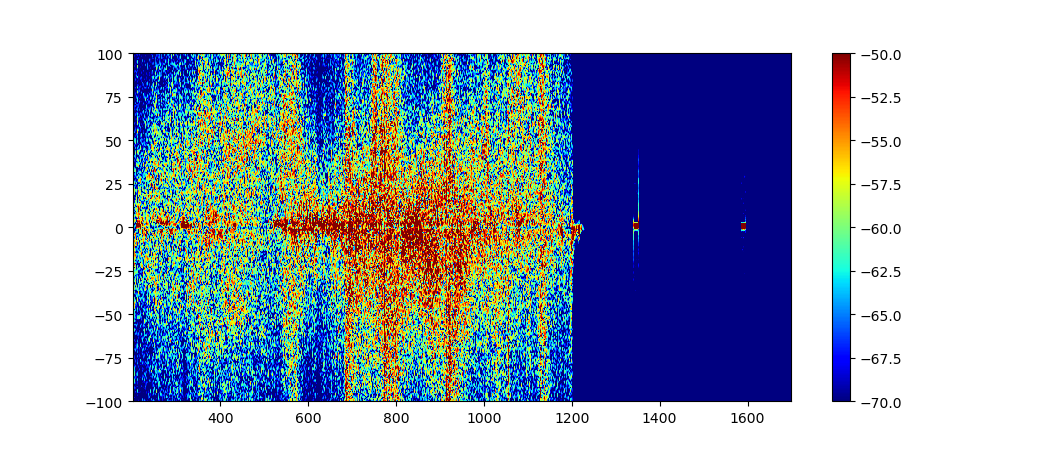

In [17]:
x, y, U = hl2a(1565, 'Doppler_33', 0.2, 1.7)
x2, y2, U2 = hl2a(1565, 'Doppler_34', 0.2, 1.7)
freq = 1/(x[1]-x[0])

y=signal.detrend(y)
y2=signal.detrend(y2)

# fig,ax = plt.subplots(num=1, figsize=(3.54*2, 2.26*2))
# ax.plot(x,y,'b-')
# ax.plot(x2,y2,'r-')
# plt.show()
wave = y+y2*1J

f,t,s=signal.spectrogram(wave,fs=freq,window='hamming',nperseg=1024*2,noverlap=1500,nfft=1024*4,detrend='linear',mode='psd',return_onesided=False)
fig, ax = plt.subplots(figsize=(3.54*3, 2.26*2))
plt.pcolormesh(t+x[0],fft.fftshift(f),10*np.log10(fft.fftshift(s, axes=0)))
plt.ylim(-100,100)
plt.set_cmap(plt.cm.jet)
plt.clim(-70,-50)
plt.colorbar()

In [20]:
plt.clim(-50,-20)

In [ ]:
from ipywidgets import interact, fixed
# from IPython.display import display

def dbsspect(wave,time,nfft)
    freq = 1/(time[1]-time[0])
    f,t,s=signal.spectrogram(wave,fs=freq,window='hamming',nperseg=nfft/2,noverlap=nfft/4,nfft=nfft,detrend='linear',mode='psd',return_onesided=False)
    fig, ax = plt.subplots(figsize=(3.54*3, 2.26*2))
    plt.pcolormesh(t+time[0],fft.fftshift(f),10*np.log10(fft.fftshift(s, axes=0)))
    return ax


# wave = read_wave('92002__jcveliz__violin-origional.wav')
interact(dbsspect, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 10000, 100));